# Diabetes classification project

The objective is to predict based on diagnostic measurements whether a patient has diabetes. 

All observations here are females at least 21 years old of Pima Indian heritage.

Data source: https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

Original owners: National Institute of Diabetes and Digestive and Kidney Diseases.

In [829]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("ggplot")

### Importing data

In [830]:
df = pd.read_csv("Data/diabetes.csv")
df = df.sample(frac=1,random_state=1).reset_index(drop=True)

### Data Dictionary

In [831]:
%%html
<style>
table {float:left}
</style>

| **varible** | **type** | **description** |
| :----------| :---------- | :---------- |
| Pregnancies | integer | Number of times pregnant |
| Glucose | integer | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure | integer | Diastolic blood pressure (*mm Hg*) |
| SkinThickness | integer | Triceps skin fold thickness (*mm*) |
| Insulin | integer | 2-Hour serum insulin (*mu U/ml*) |
| BMI | float | Body mass index (*weight in kg/(height in m)^2*) |
| DiabetesPedigreeFunction | float | Diabetes pedigree function |
| Age | integer | Age (*years*) |
| Outcome | integer | Class variable, 1 is interpreted as "tested positive for diabetes" |

In [832]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,136,74,26,135,26.0,0.647,51,0
1,1,151,60,0,0,26.1,0.179,22,0
2,6,109,60,27,0,25.0,0.206,27,0
3,3,61,82,28,0,34.4,0.243,46,0
4,1,116,78,29,180,36.1,0.496,25,0


In [833]:
f"Data contains {df.shape[0]} rows and {df.shape[1]} columns"

'Data contains 768 rows and 9 columns'

In [834]:
f"Is there any duplicated row: {df.duplicated().any()}"

'Is there any duplicated row: False'

In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Preparing data

### Missing values

There is no "NaN" values in the data but there is a lot of "0" values in columns where its not possible to have ("BloodPressure", "SkinThickness", "BMI").

Values equal to 0 in this columns will be transformed into mean value for specific column.

In [836]:
zero_cols = ["BloodPressure", "SkinThickness", "BMI"]
df[zero_cols] = df[zero_cols].replace(0, np.nan)

In [837]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [838]:
df = df.fillna(df.mean())

In [839]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,136,74.0,26.00000,135,26.0,0.647,51,0
1,1,151,60.0,29.15342,0,26.1,0.179,22,0
2,6,109,60.0,27.00000,0,25.0,0.206,27,0
3,3,61,82.0,28.00000,0,34.4,0.243,46,0
4,1,116,78.0,29.00000,180,36.1,0.496,25,0


In [840]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Outliers

Method: Quantile filter

Values considered to be outliers are in the last percentile.

In [841]:
cols = df.columns.drop("Outcome")
df_sub = df.loc[:, cols]
df_sub.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,136,74.0,26.00000,135,26.0,0.647,51
1,1,151,60.0,29.15342,0,26.1,0.179,22
2,6,109,60.0,27.00000,0,25.0,0.206,27
3,3,61,82.0,28.00000,0,34.4,0.243,46
4,1,116,78.0,29.00000,180,36.1,0.496,25


In [842]:
lim = df_sub < df_sub.quantile(0.99, numeric_only=False)

In [843]:
display("Limit values for every column:")
df_sub.quantile(0.99,numeric_only=False)

'Limit values for every column:'

Pregnancies                  13.00000
Glucose                     196.00000
BloodPressure               106.00000
SkinThickness                51.33000
Insulin                     519.90000
BMI                          50.75900
DiabetesPedigreeFunction      1.69833
Age                          67.00000
Name: 0.99, dtype: float64

In [844]:
df.loc[:, cols] = df_sub.where(lim, np.nan)

In [845]:
df = df.dropna()

In [846]:
f"Data contains {df.shape[0]} rows and {df.shape[1]} columns"

'Data contains 705 rows and 9 columns'

In [847]:
display(df["Outcome"].unique()),
display("Proportion of values in target column")
df["Outcome"].value_counts()

array([0, 1], dtype=int64)

'Proportion of values in target column'

0    472
1    233
Name: Outcome, dtype: int64

In [848]:
display("Missing values:")
df.isna().sum()

'Missing values:'

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Visualization

### Pairplot

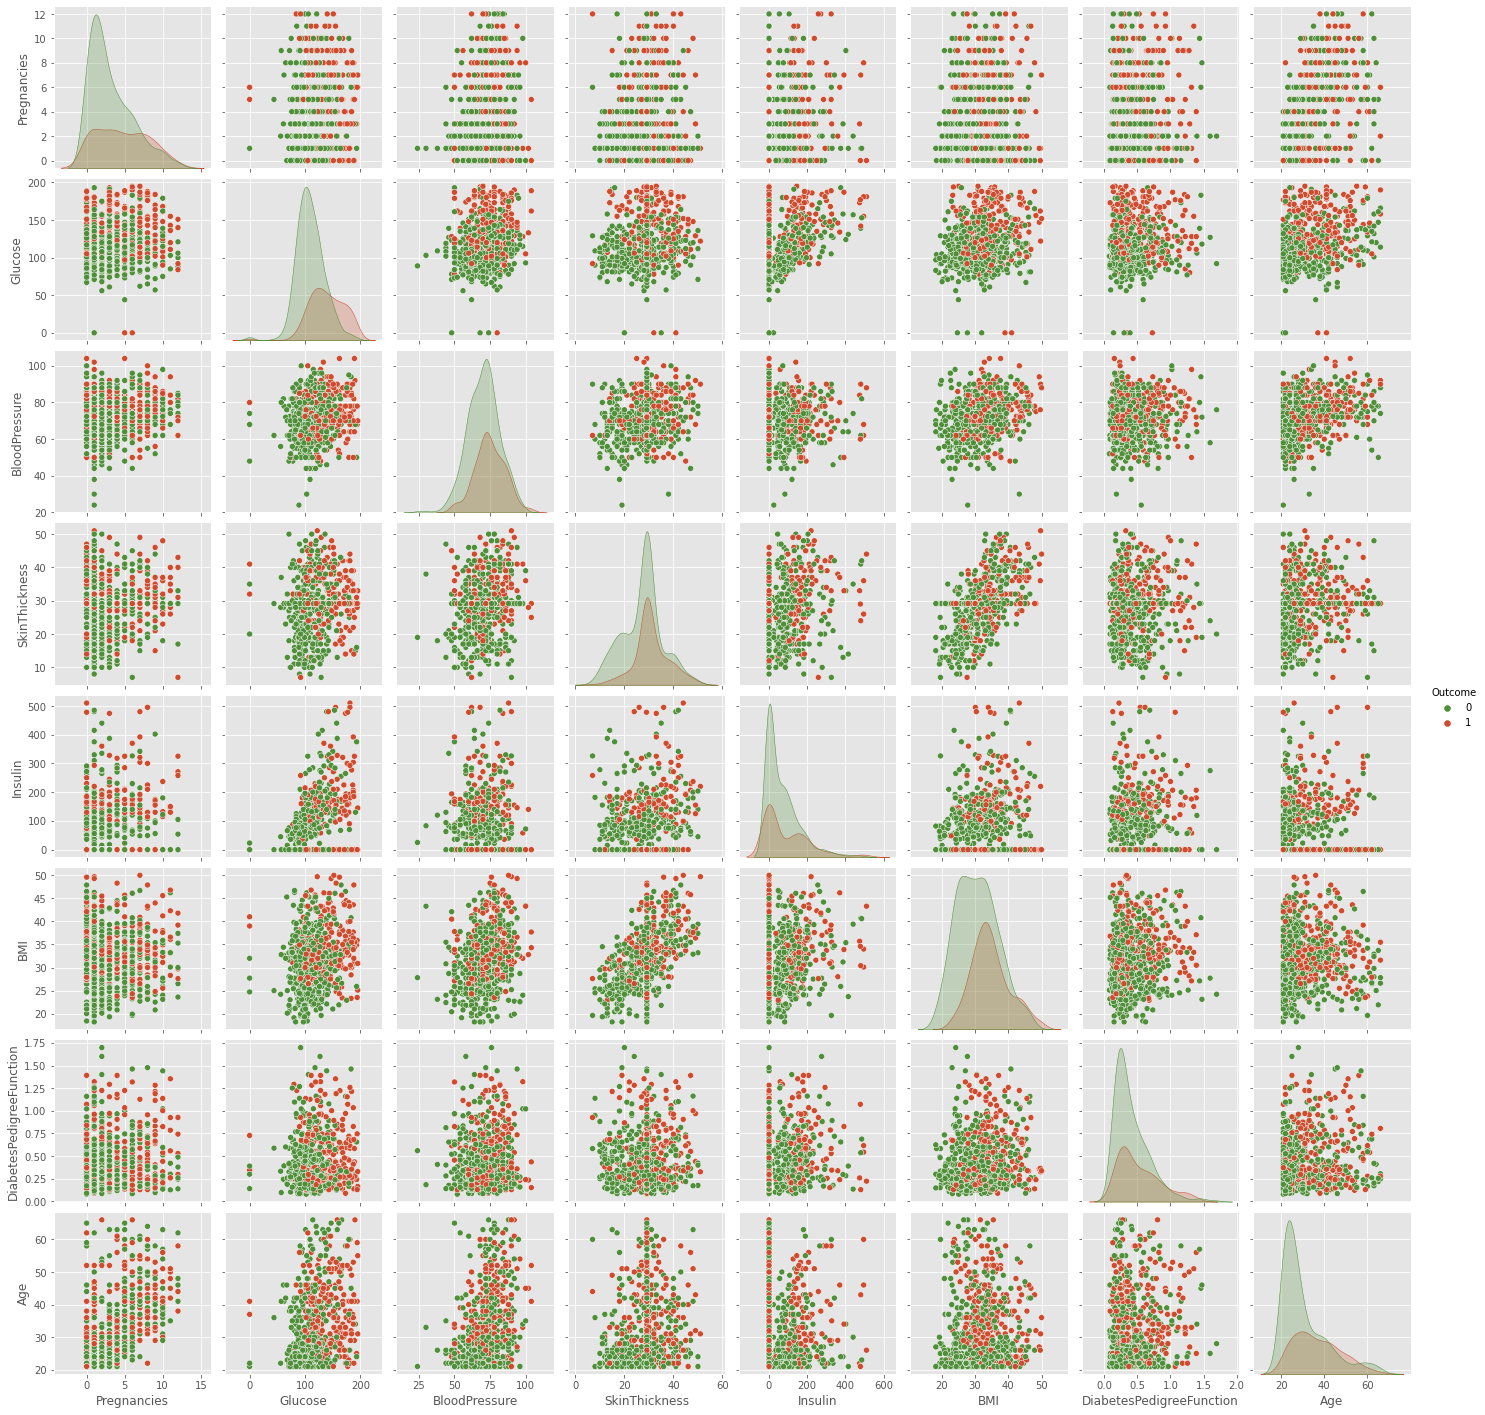

In [849]:
palette = {0:"#508f39", 1:"#cf4b2d"}
sns.pairplot(data = df, hue = 'Outcome',palette = palette)
plt.show()

### Boxplot

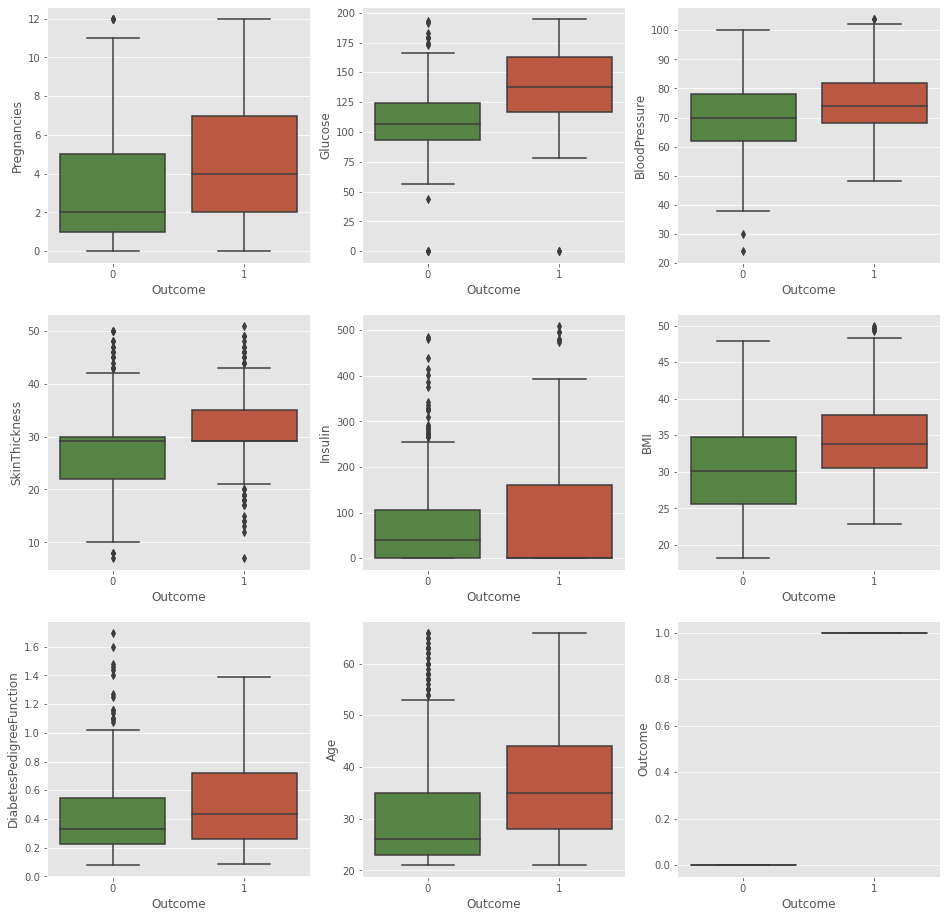

In [850]:
n_rows=3
n_cols=3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 16))
for i, column in enumerate(df):
    sns.boxplot( y = df[column], ax=axes[i // n_cols, i % n_cols], x=df["Outcome"],palette = palette)

### Histogram

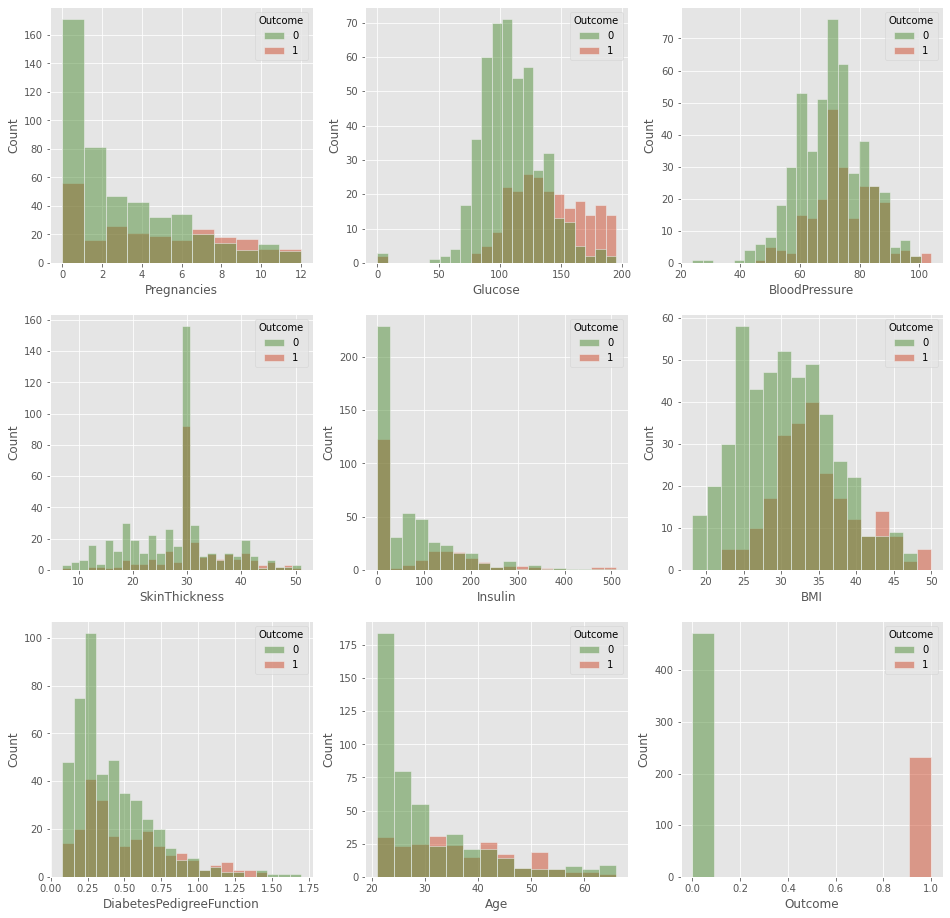

In [851]:
n_rows=3
n_cols=3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 16))
for i, column in enumerate(df):
    sns.histplot(df, x = column, ax=axes[i // n_cols, i % n_cols], hue = "Outcome", palette = palette)

### Correlation

In [852]:
corr = df.corr().sort_values('Outcome', ascending=False).round(3)
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.227,0.454,0.190,0.213,0.113,0.291,0.184,0.268,1.000
Glucose,0.139,1.000,0.216,0.136,0.311,0.198,0.075,0.276,0.454
BMI,0.022,0.198,0.273,0.554,0.184,1.000,0.099,0.065,0.291
Age,0.568,0.276,0.344,0.149,-0.053,0.065,0.071,1.000,0.268
Pregnancies,1.000,0.139,0.191,0.134,-0.059,0.022,0.018,0.568,0.227
SkinThickness,0.134,0.136,0.214,1.000,0.107,0.554,0.020,0.149,0.213
BloodPressure,0.191,0.216,1.000,0.214,-0.047,0.273,0.027,0.344,0.190
DiabetesPedigreeFunction,0.018,0.075,0.027,0.020,0.170,0.099,1.000,0.071,0.184
Insulin,-0.059,0.311,-0.047,0.107,1.000,0.184,0.170,-0.053,0.113


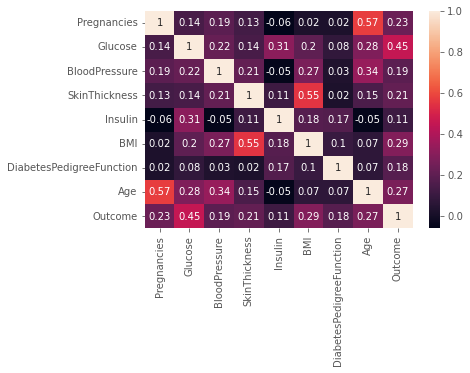

In [853]:
plt.figsize=(20, 20)
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

### Split the data into 80% train and 20% test

In [854]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [855]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
f"Df shape: {df.shape}, X shape: {X.shape}, y shape: {y.shape}"

'Df shape: (705, 9), X shape: (705, 8), y shape: (705,)'

In [856]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2115)

### Data standardization

In [857]:
from sklearn.preprocessing import StandardScaler

In [858]:
ss = StandardScaler()
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
X_std = sc.fit_transform(X)

### PCA

In [859]:
from sklearn.decomposition import PCA

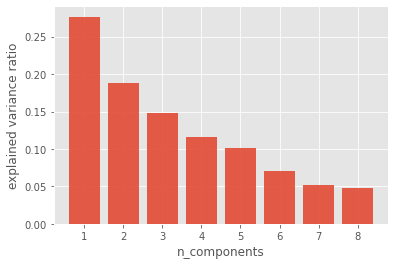

In [860]:
pca = PCA(n_components=8)
components  = pca.fit_transform(X_std)
plt.bar(x = range(1,9), height = pca.explained_variance_ratio_, alpha=0.9, align='center')
plt.xlabel("n_components")
plt.ylabel("explained variance ratio")
fig.tight_layout()
plt.show()


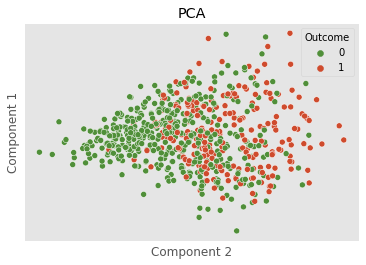

In [861]:
sns.scatterplot(x = components[:,0], y= components[:,1], hue=y, palette=palette)
plt.ylabel("Component 1")
plt.xlabel("Component 2")
plt.title(f"PCA")
plt.xticks([])
plt.yticks([])
plt.show()

## Metric

In this project, I will focus on the Recall metric
because not classifying a diabetic as diabetes may \
have a worse effect than classifying a healthy
person as diabetic.

In [862]:
from sklearn.metrics import classification_report, f1_score,  recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [863]:
summary = []

In [864]:
def draw_cm(csf, y_true, X):
    """
    Function computes and draws confusion matrix

    Parameters:
        csf : Sklearn classification models 
        y_true: True data (target)
        X: Dependent variable which needs to be predicted by this model
    """
    cm = confusion_matrix(y_true, csf.predict(X))
    sns.heatmap(cm, annot=True)
    plt.title(f"Recall: {recall_score(y_true, csf.predict(X)).round(2)}") 
    plt.xticks([0.5,1.5], ['Healthy', 'Diabetes'])
    plt.xlabel("Predicted label")
    plt.yticks([0.5,1.5], ['Healthy', 'Diabetes'])
    plt.ylabel("True label")
    plt.show()

## K-nearest neighbors

In [865]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV

In [866]:
param_grid_knn = {"n_neighbors": [1,3,5,7,9,11,13,15]}

In [867]:
grid_search = GridSearchCV(KNN(), param_grid_knn, cv=5, scoring="recall")

In [868]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             scoring='recall')

In [869]:
display(f"Grid search - best score :{grid_search.best_score_}")
f"Train accuracy : {grid_search.score(X_test,y_test)}"

'Grid search - best score :0.5318634423897582'

'Train accuracy : 0.5531914893617021'

In [870]:
grid_search.best_params_

{'n_neighbors': 1}

In [871]:
knn = KNN(n_neighbors = 5)
knn.fit(X_train,y_train)
pred_y_train = knn.predict(X_train)
pred_y_test = knn.predict(X_test)

In [872]:
print(classification_report(y_test, pred_y_test, target_names = ["1","0"]))

              precision    recall  f1-score   support

           1       0.75      0.87      0.81        94
           0       0.62      0.43      0.51        47

    accuracy                           0.72       141
   macro avg       0.69      0.65      0.66       141
weighted avg       0.71      0.72      0.71       141



In [873]:
 cm = confusion_matrix(y_test, pred_y_test)

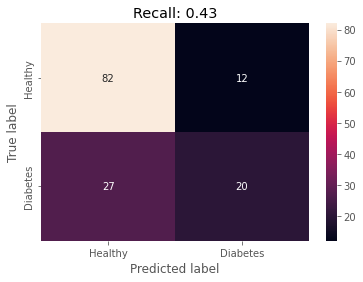

In [874]:
draw_cm(knn, y_test, X_test)

In [875]:
summary.append(["KNN",recall_score(y_test, pred_y_test).round(2),"-","-"])

## Logistic Regression

In [876]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Basic model

              precision    recall  f1-score   support

           1       0.81      0.93      0.86        94
           0       0.79      0.55      0.65        47

    accuracy                           0.80       141
   macro avg       0.80      0.74      0.76       141
weighted avg       0.80      0.80      0.79       141



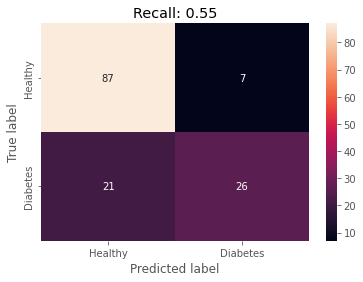

In [877]:
lr = LogisticRegression(random_state=2115)
lr.fit(X_train_std,y_train)
pred_y = lr.predict(X_test_std)
pred_y_train = lr.predict(X_train_std)
print(classification_report(y_test, pred_y, target_names = ["1","0"]))
draw_cm(lr, y_test, X_test_std)

## Logistic Regression - Model tuning

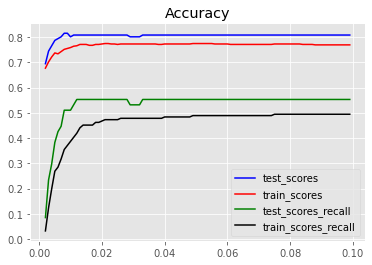

In [878]:
#Serching for the optimal parameter C

test_scores = []
train_scores = []

test_scores_recall = []
train_scores_recall = []
count = 0

param = np.arange(0.002, 0.1, 0.001)

for i in param:
  lr = LogisticRegression(C=i, random_state=2115)
  lr.fit(X_train_std,y_train)
    
  pred_y_c = lr.predict(X_test_std)
  pred_y_train_c = lr.predict(X_train_std)
    
  test_scores.append(accuracy_score(pred_y_c, y_test))
  train_scores.append(accuracy_score(pred_y_train_c, y_train))
    
  if set(y_test) == set(pred_y_c) and set(y_train) == set(pred_y_train_c):
      test_scores_recall.append(recall_score(y_test, pred_y_c))
      train_scores_recall.append(recall_score(y_train,pred_y_train_c))
  else:
      test_scores_recall.append(0)
      train_scores_recall.append(0)
      count += 1
    

plt.plot(param, test_scores,c="b", label="test_scores")
plt.plot(param, train_scores, c="r", label="train_scores")
plt.plot(param, test_scores_recall,c="g", label="test_scores_recall")
plt.plot(param, train_scores_recall, c="k", label="train_scores_recall")
plt.title("Accuracy")
plt.legend()
plt.show()

In [879]:
scores_sum = np.array(test_scores) + np.array(train_scores)
display(f"Accuracy: ")
display(f"Max test_scores - {max(test_scores)} for C: {param[test_scores.index(max(test_scores))]}")
display(f"Max train_scores - {max(train_scores)} for C: {param[train_scores.index(max(train_scores))]}")
f"Max sum of scores - {max(scores_sum)} for C: {param[list(scores_sum).index(max(scores_sum))]}"

'Accuracy: '

'Max test_scores - 0.8156028368794326 for C: 0.008'

'Max train_scores - 0.774822695035461 for C: 0.020999999999999998'

'Max sum of scores - 1.5833333333333333 for C: 0.020999999999999998'

In [880]:
scores_sum_recall = np.array(test_scores_recall) + np.array(train_scores_recall)
display(f"Recall: ")
display(f"Max test_scores_recall - {max(test_scores_recall)} for C: {param[test_scores_recall.index(max(test_scores_recall))]}")
display(f"Max train_scores_recall - {max(train_scores_recall)} for C: {param[train_scores_recall.index(max(train_scores_recall))]}")
f"Max sum of scores recall - {max(scores_sum_recall)} for C: {param[list(scores_sum_recall).index(max(scores_sum_recall))]}"

'Recall: '

'Max test_scores_recall - 0.5531914893617021 for C: 0.012'

'Max train_scores_recall - 0.4946236559139785 for C: 0.075'

'Max sum of scores recall - 1.0478151452756808 for C: 0.075'

In [881]:
lr = LogisticRegression(C = 0.085, random_state=2115)
lr.fit(X_train_std,y_train)

pred_y = lr.predict(X_test_std)
pred_y_train = lr.predict(X_train_std)
display(f"Test recall: {recall_score(y_test,lr.predict(X_test_std))}")
f"Train recall: {recall_score(y_train,lr.predict(X_train_std))}"
                 

'Test recall: 0.5531914893617021'

'Train recall: 0.4946236559139785'

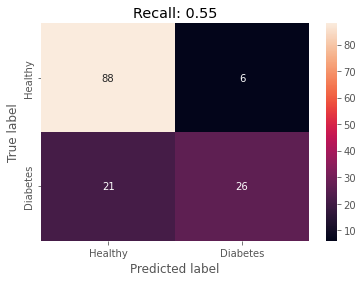

In [882]:
draw_cm(lr, y_test, X_test_std)

In [883]:
print(classification_report(y_test, pred_y, target_names = ["1","0"]))

              precision    recall  f1-score   support

           1       0.81      0.94      0.87        94
           0       0.81      0.55      0.66        47

    accuracy                           0.81       141
   macro avg       0.81      0.74      0.76       141
weighted avg       0.81      0.81      0.80       141



## Data transformation

Transformating selected columns so that their distribution resembles the Gaussian distribution.

In [884]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

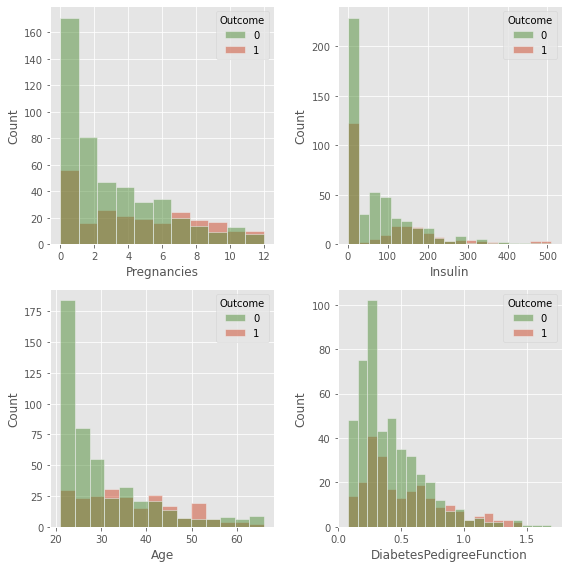

In [885]:
n_rows=2
n_cols=2
columns = ['Pregnancies', 'Insulin', 'Age', 'DiabetesPedigreeFunction']

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 8))
for i, column in enumerate(df[columns]):
    sns.histplot(df, x = column, ax=axes[i // n_cols, i % n_cols], hue = "Outcome", palette = palette)
fig.tight_layout()

In [886]:
df_log = np.log(df[columns] + 1)
df_log = df_log.add_suffix("_log")
df_concat = pd.concat([df_log, df[columns], df["Outcome"]], axis=1)

In [887]:
col_order = ['Pregnancies_log', 'Pregnancies',
 'Insulin_log','Insulin',
 'Age_log', 'Age',
 'DiabetesPedigreeFunction_log',
 'DiabetesPedigreeFunction',
 'Outcome']

In [888]:
df_concat = df_concat[col_order]

In [889]:
df_concat.head()

,Pregnancies_log,Pregnancies,Insulin_log,Insulin,Age_log,Age,DiabetesPedigreeFunction_log,DiabetesPedigreeFunction,Outcome
0,2.079442,7.0,4.912655,135.0,3.951244,51.0,0.498955,0.647,0
1,0.693147,1.0,0.000000,0.0,3.135494,22.0,0.164667,0.179,0
2,1.945910,6.0,0.000000,0.0,3.332205,27.0,0.187309,0.206,0
3,1.386294,3.0,0.000000,0.0,3.850148,46.0,0.217528,0.243,0
4,0.693147,1.0,5.198497,180.0,3.258097,25.0,0.402795,0.496,0


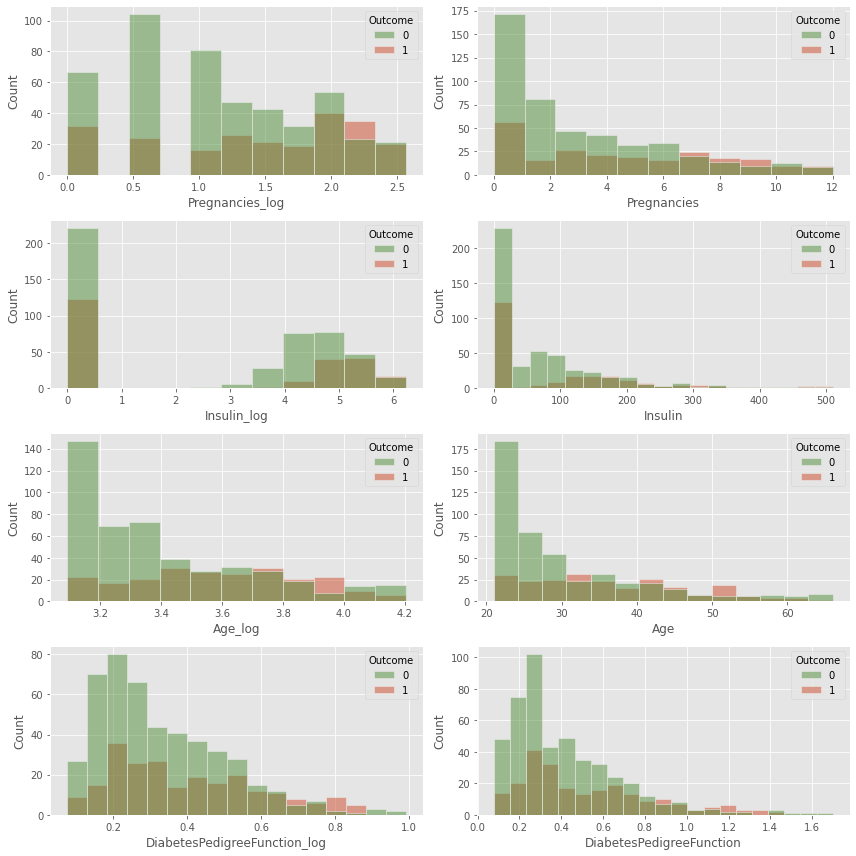

In [890]:
n_rows=4
n_cols=2


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))
for i, column in enumerate(df_concat[df_concat.columns.drop("Outcome")]):
    sns.histplot(df_concat, x = column, ax=axes[i // n_cols, i % n_cols], hue = "Outcome", palette = palette)
fig.tight_layout()

In [891]:
df_log = pd.concat([df_log, df.drop(columns, axis=1)], axis=1)

### Scaling data

In [892]:
X = df_log.drop("Outcome", axis=1)
y = df_log["Outcome"]
X_train_log, X_test_log, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2115)

In [893]:
sc = StandardScaler()
sc.fit(X_train_log)
X_train_log_std = sc.transform(X_train_log)
X_test_log_std = sc.transform(X_test_log)

### Polynomial Features

In [894]:
from sklearn.preprocessing import PolynomialFeatures

In [895]:
poly = PolynomialFeatures(degree=2, include_bias = False).fit(X_train_log_std)
X_train_poly = poly.transform(X_train_log_std)
X_test_poly = poly.transform(X_test_log_std)

display(f"Shape without polynomial features:{X_train_log_std.shape}")
f"Shape after adding polynomial features: {X_train_poly.shape}"

'Shape without polynomial features:(564, 8)'

'Shape after adding polynomial features: (564, 44)'

### Retraining model with transformed data.

In [896]:
lr = LogisticRegression(C = 0.085, random_state=2115)
lr.fit(X_train_poly,y_train)

pred_y = lr.predict(X_test_poly)
pred_y_train = lr.predict(X_train_poly)

print(classification_report(y_test, pred_y, target_names = ["1","0"]))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85        94
           0       0.74      0.55      0.63        47

    accuracy                           0.79       141
   macro avg       0.77      0.73      0.74       141
weighted avg       0.78      0.79      0.78       141



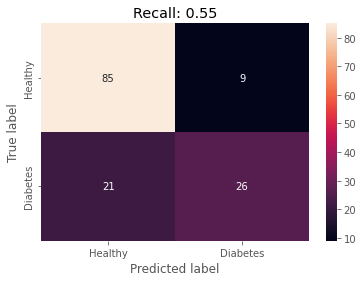

In [897]:
draw_cm(lr,y_test, X_test_poly)

### ROC for Logistic Regression

In [898]:
y_pred_test_class_1 = lr.predict_proba(X_test_poly)[:,1]

In [899]:
lr_fp, lr_tp, threshold = roc_curve(y_test, y_pred_test_class_1, pos_label=1)
lr_auc = auc(lr_fp,lr_tp)

In [900]:
f"Area under the curve Logistic regression classifier: {lr_auc}"

'Area under the curve Logistic regression classifier: 0.8551380715255772'

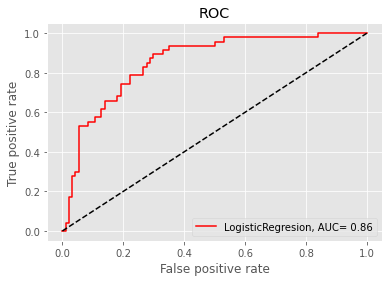

In [901]:
plt.plot(lr_fp, lr_tp, linestyle= "-", color = "r", label=f"LogisticRegresion, AUC= {lr_auc.round(2)}")
plt.plot([0,1],[0,1], linestyle='dashed', color = 'k')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.title("ROC")
plt.show()

## Threshold for Logistic Regression

In [902]:
y_pred_test_class_1 = lr.predict_proba(X_test_poly)[:,1]

In [903]:
recall_lr = []
precision_lr = []
f1_score_lr = []
for thresh in threshold[3:]:
    y_pred = np.where(y_pred_test_class_1 > thresh, 1, 0)
    recall_lr.append(recall_score(y_test, y_pred ))
    f1_score_lr.append(f1_score(y_test, y_pred ))
    precision_lr.append(precision_score(y_test,y_pred))

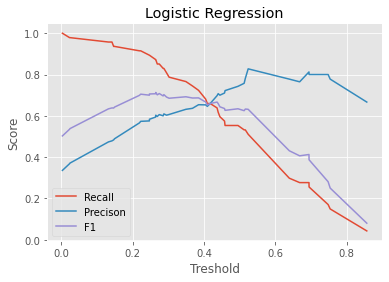

In [904]:
plt.plot(threshold[3:],recall_lr, label = "Recall")
plt.plot(threshold[3:],precision_lr, label = "Precison")
plt.plot(threshold[3:],f1_score_lr, label = "F1")
plt.xlabel("Treshold")
plt.ylabel("Score")
plt.title("Logistic Regression")
plt.legend()
plt.show()

In [905]:
threshold_value = 0.26
y_pred_threshold = [1 if prob > threshold_value else 0 for prob in y_pred_test_class_1]

In [906]:
print(classification_report(y_test, y_pred_threshold, target_names = ["1","0"]))

              precision    recall  f1-score   support

           1       0.93      0.69      0.79        94
           0       0.59      0.89      0.71        47

    accuracy                           0.76       141
   macro avg       0.76      0.79      0.75       141
weighted avg       0.82      0.76      0.77       141



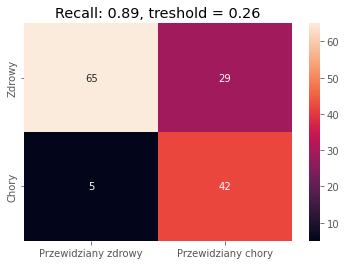

In [907]:
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot=True)
plt.title(f"Recall: {recall_score(y_test, y_pred_threshold).round(2)}, treshold = {threshold_value}")
plt.xticks([0.5,1.5], ['Przewidziany zdrowy', 'Przewidziany chory'])
plt.yticks([0.5,1.5], ['Zdrowy', 'Chory'])
plt.show()

In [908]:
summary.append(["Lr",recall_score(y_test, y_pred_threshold).round(2),0.26, {lr_auc.round(2)}])

## Support vector machine

In [909]:
from sklearn.svm import SVC

In [910]:
param_grid_svc = {
    "random_state": [2115],
    "kernel" : ["linear", "poly", "rbf", "sigmoid",],
    "gamma" : ["scale","auto", 0.001, 0.01, 0.1],
    "C": [0.01,0.1,1.0,10.0,100.0]
}

In [911]:
grid_search= GridSearchCV(SVC(), param_grid_svc, cv=5, n_jobs=-1, scoring="recall")

In [912]:
grid_search.fit(X_train_poly, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [2115]},
             scoring='recall')

In [913]:
display(f"Grid search best score :{grid_search.best_score_}")
f"Train score : {grid_search.score(X_train_poly,y_train)}"

'Grid search best score :0.5317211948790896'

'Train score : 0.9516129032258065'

In [914]:
grid_search.best_params_

{'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 2115}

In [915]:
svc = SVC(C= 100.0, gamma= 0.01, kernel= 'rbf', probability = True, random_state = 2115)
svc.fit(X_train_poly, y_train)

SVC(C=100.0, gamma=0.01, probability=True, random_state=2115)

In [916]:
print(classification_report(y_train, svc.predict(X_train_poly), target_names = ["1","0"]))

              precision    recall  f1-score   support

           1       0.98      0.97      0.97       378
           0       0.95      0.95      0.95       186

    accuracy                           0.97       564
   macro avg       0.96      0.96      0.96       564
weighted avg       0.97      0.97      0.97       564



In [917]:
print(classification_report(y_test, svc.predict(X_test_poly), target_names = ["1","0"]))

              precision    recall  f1-score   support

           1       0.78      0.77      0.77        94
           0       0.55      0.57      0.56        47

    accuracy                           0.70       141
   macro avg       0.67      0.67      0.67       141
weighted avg       0.71      0.70      0.70       141



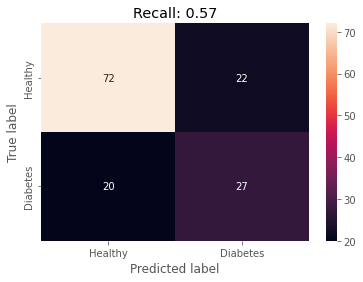

In [918]:
draw_cm(svc,y_test, X_test_poly)

In [919]:
y_pred_test_class_1 = svc.predict_proba(X_test_poly)[:,1]

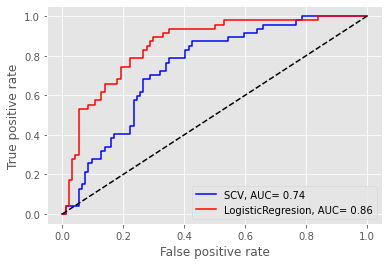

In [920]:
svc_fp, svc_tp, threshold = roc_curve(y_test, y_pred_test_class_1, pos_label=1)
svc_auc = auc(svc_fp,svc_tp)

plt.plot(svc_fp, svc_tp, linestyle= "-", color = "b", label=f"SCV, AUC= {svc_auc.round(2)}")
plt.plot(lr_fp, lr_tp, linestyle= "-", color = "r", label=f"LogisticRegresion, AUC= {lr_auc.round(2)}")
plt.plot([0,1],[0,1], linestyle='dashed', color = 'k')
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

### Threshold for Support vector machine

In [921]:
recall_svc = []
precision_svc = []
f1_score_scv = []
for thresh in threshold[3:]:
    y_pred = np.where(y_pred_test_class_1 > thresh, 1, 0)
    f1_score_scv.append(f1_score(y_test, y_pred ))
    recall_svc.append(recall_score(y_test, y_pred ))
    precision_svc.append(precision_score(y_test,y_pred))

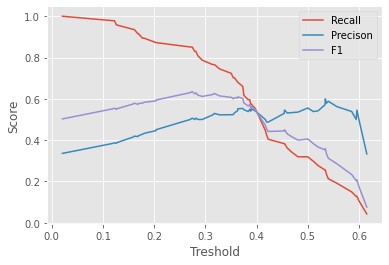

In [922]:
plt.plot(threshold[3:],recall_svc, label = "Recall")
plt.plot(threshold[3:],precision_svc, label = "Precison")
plt.plot(threshold[3:],f1_score_scv, label = "F1")
plt.xlabel("Treshold")
plt.ylabel("Score")
plt.legend()
plt.show()


In [923]:
threshold_value = 0.28
y_pred_threshold = [1 if prob > threshold_value else 0 for prob in y_pred_test_class_1]

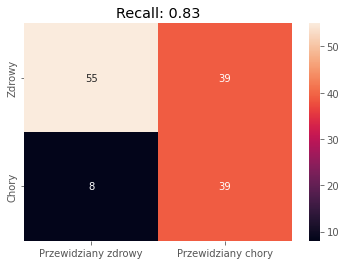

In [924]:
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot=True)
plt.title(f"Recall: {recall_score(y_test, y_pred_threshold).round(2)}")
plt.xticks([0.5,1.5], ['Przewidziany zdrowy', 'Przewidziany chory'])
plt.yticks([0.5,1.5], ['Zdrowy', 'Chory'])
plt.show()

In [925]:
summary.append(["SCV",recall_score(y_test, y_pred_threshold).round(2), 2.8, {svc_auc.round(2)}])

## Random Forest

In [926]:
from sklearn.ensemble import RandomForestClassifier

Basic model

In [927]:
rfc = RandomForestClassifier(random_state=2115)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

display(f"Recall score for training data: {recall_score(y_train, y_pred_train)}")
f"Recall score for test data: {recall_score(y_test, y_pred)}"


'Recall score for training data: 1.0'

'Recall score for test data: 0.5319148936170213'

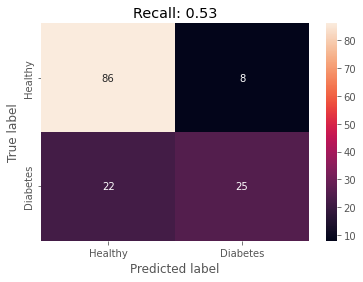

In [928]:
draw_cm(rfc,y_test,X_test)

In [929]:
param_grid_rf = {
 "random_state": [2115],
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 400,]
}

In [930]:
grid_search= GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, n_jobs= 6, scoring="recall")

In [931]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, 100, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 400],
                         'random_state': [2115]},
             scoring='recall')

In [932]:
display(f"Grid search best score :{grid_search.best_score_}")
f"Test score : {grid_search.score(X_test,y_test)}"

'Grid search best score :0.564516129032258'

'Test score : 0.574468085106383'

In [933]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 400,
 'random_state': 2115}

In [934]:
rfc = RandomForestClassifier(
    bootstrap = False,
    max_depth=50,
    n_estimators = 100,
    min_samples_leaf= 2,
    min_samples_split = 10,
    random_state = 2115)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       min_samples_split=10, random_state=2115)

In [935]:
print(classification_report(y_test, rfc.predict(X_test), target_names = ["1","0"]))

              precision    recall  f1-score   support

           1       0.81      0.88      0.84        94
           0       0.71      0.57      0.64        47

    accuracy                           0.78       141
   macro avg       0.76      0.73      0.74       141
weighted avg       0.77      0.78      0.77       141



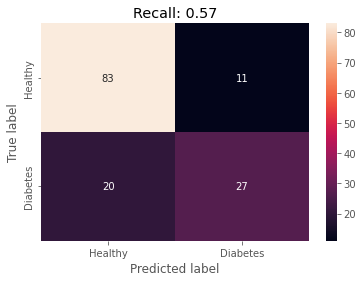

In [936]:
draw_cm(rfc, y_test, X_test)

## ROC for Random Forest

In [937]:
y_pred_test_class_1 = rfc.predict_proba(X_test)[:,1]

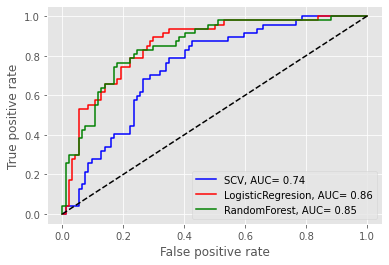

In [938]:
rfc_fp, rfc_tp, threshold = roc_curve(y_test, y_pred_test_class_1, pos_label=1)

rfc_auc = auc(rfc_fp,rfc_tp)

plt.plot(svc_fp, svc_tp, linestyle= "-", color = "blue", label=f"SCV, AUC= {svc_auc.round(2)}")
plt.plot(lr_fp, lr_tp, linestyle= "-", color = "r",label=f"LogisticRegresion, AUC= {lr_auc.round(2)}")
plt.plot(rfc_fp, rfc_tp, linestyle= "-", color = "g",label=f"RandomForest, AUC= {rfc_auc.round(2)}")

plt.plot([0,1],[0,1], linestyle='dashed', color = 'k')
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()


### Threshold for Random Forest

In [939]:
recall_svc = []
precision_svc = []
f1_score_scv = []
for thresh in threshold[3:]:
    y_pred = np.where(y_pred_test_class_1 > thresh, 1, 0)
    f1_score_scv.append(f1_score(y_test, y_pred ))
    recall_svc.append(recall_score(y_test, y_pred ))
    precision_svc.append(precision_score(y_test,y_pred))

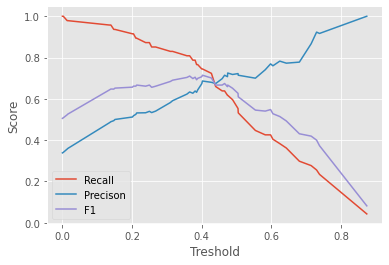

In [940]:
plt.plot(threshold[3:],recall_svc, label = "Recall")
plt.plot(threshold[3:],precision_svc, label = "Precison")
plt.plot(threshold[3:],f1_score_scv, label = "F1")
plt.xlabel("Treshold")
plt.ylabel("Score")
plt.legend()
plt.show()


In [941]:
threshold_value = 0.3
y_pred_threshold = [1 if prob > threshold_value else 0 for prob in y_pred_test_class_1]

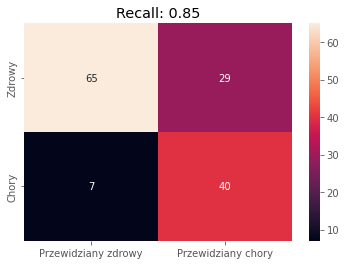

In [942]:
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot=True)
plt.title(f"Recall: {recall_score(y_test, y_pred_threshold).round(2)}")
plt.xticks([0.5,1.5], ['Przewidziany zdrowy', 'Przewidziany chory'])
plt.yticks([0.5,1.5], ['Zdrowy', 'Chory'])
plt.show()

In [943]:
summary.append(["RFC",recall_score(y_test, y_pred_threshold).round(2),0.3, {rfc_auc.round(2)}])

### Feature importances

In [944]:
rfc_std = np.std([rfc.feature_importances_ for tree in rfc.estimators_], axis=0)
rfc_std

array([9.71445147e-17, 4.44089210e-16, 0.00000000e+00, 1.66533454e-16,
       6.24500451e-17, 3.33066907e-16, 2.91433544e-16, 3.05311332e-16])

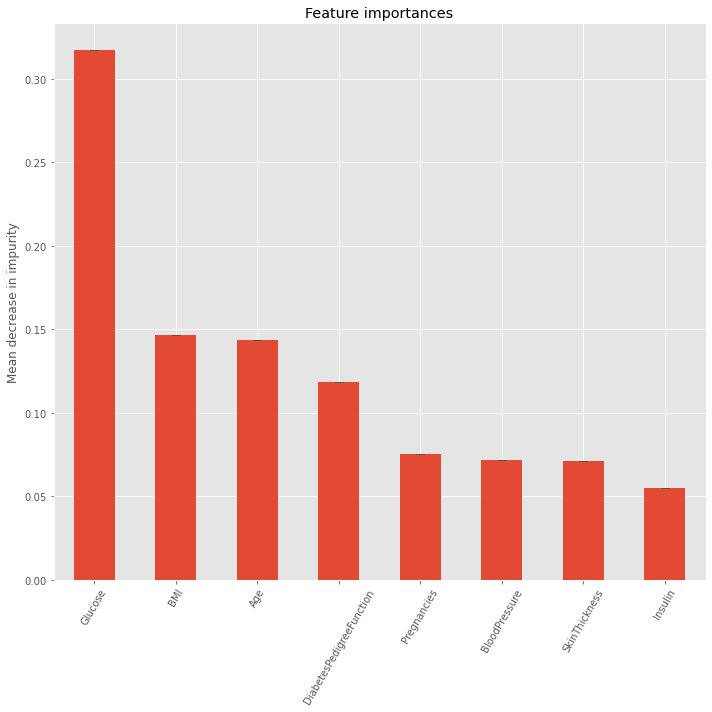

In [945]:
importances = rfc.feature_importances_
forest_importances = pd.Series(importances, index = df.columns.drop("Outcome")).sort_values(ascending = False)
rfc_std = np.std([importances for tree in rfc.estimators_], axis=0)


plt.subplots(figsize = (10,10))
forest_importances.plot.bar(yerr=rfc_std, capsize=4)
plt.title("Feature importances")
plt.ylabel("Mean decrease in impurity")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [1035]:
pd.DataFrame(data= summary,columns=['Clasiffier', 'Recall', 'Threshold',"AUC"])

,Clasiffier,Recall,Threshold,AUC
0,KNN,0.43,-,-
1,Lr,0.89,0.26,{0.86}
2,SCV,0.83,2.8,{0.74}
3,RFC,0.85,0.3,{0.85}
4,Final_Lr,0.91,0.35,{0.87}
5,Final_Lr,0.91,0.35,{0.87}
6,Final_Lr,0.91,0.35,{0.87}
7,Final_Lr,0.91,0.35,{0.87}
8,Final_Lr,0.91,0.35,{0.87}


Among the models, the best result was achieved by **logistic regression**: \
**AUC**- 0.86\
**Recall** - 0.88\
**Threshold** - 0.26\

## Logistic Regression - Model tuning with pipeline

In [983]:
from sklearn.pipeline import make_pipeline

In [1018]:
scaler = StandardScaler()
polynomial = PolynomialFeatures(2, interaction_only=False)
lr_2 = LogisticRegression()
param_grid_lr = [{
    'logisticregression__random_state': [2115],
    'logisticregression__C': [0.01, 0.1,0.3,0.5,1],
    'logisticregression__penalty':['l1','l2'],
    'logisticregression__tol':[0.0001, 0.0003, 0.001],
    'logisticregression__max_iter':[100,200,500,1000],
    "logisticregression__solver": ["liblinear"]
},{
    
    'logisticregression__random_state' : [2115],
    'logisticregression__C': [0.01, 0.1,0.3,0.5,1],
    'logisticregression__penalty':["l2"],
    'logisticregression__tol':[0.0001],
    'logisticregression__max_iter':[100,200,500,1000],
    "logisticregression__solver": ["lbfgs"]
}
]

In [1019]:
pipe = make_pipeline(scaler, polynomial, lr_2)

In [1020]:
grid = GridSearchCV(estimator=pipe, param_grid=param_grid_lr, cv=10, scoring='recall', n_jobs=-1)

In [1021]:
grid.fit(X_train_log, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.01, 0.1, 0.3, 0.5, 1],
                          'logisticregression__max_iter': [100, 200, 500, 1000],
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression...
                          'logisticregression__solver': ['liblinear'],
                          'logisticregression__tol': [0.0001, 0.0003, 0.001]},
                         {'logisticregression__C': [0.01, 0.1, 0.3, 0.5, 1],
                          'logisticregression__max_iter': [100, 200, 500, 1000],
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__random_state': [2115],
                          'logisticregression__solver': ['lbfgs'],
                          'logisticregression__tol': [0.0001]}],
             scoring='recall')

In [1022]:
f"best score: {grid.best_score_}"

'best score: 0.6040935672514619'

In [1023]:
grid.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 2115,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001}

In [1024]:
recall = recall_score(y_test, grid.predict(X_test_log))
f"Recall for Test: {recall}"
f"Recall for train: {recall_score(y_train, grid.predict(X_train_log))}" 

'Recall for train: 0.6290322580645161'

In [1025]:
lr_2 = LogisticRegression(
    random_state= 2115, 
    max_iter = 100, 
    tol = 0.0001, 
    penalty = "l1", 
    C = 0.1,
    solver = "liblinear")
lr_2.fit(X_train_poly,y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=2115, solver='liblinear')

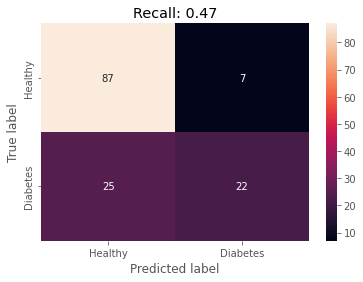

In [1026]:
draw_cm(lr_2, y_test, X_test_poly)

In [1027]:
y_pred_test_class_1 = lr_2.predict_proba(X_test_poly)[:,1]

In [1028]:
lr_2_fp, lr_2_tp, threshold = roc_curve(y_test, y_pred_test_class_1, pos_label=1)
lr_2_auc = auc(lr_fp,lr_tp)

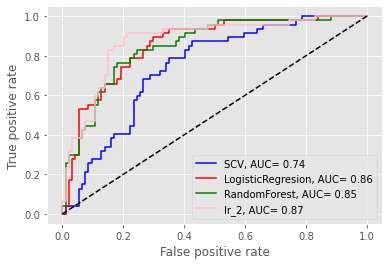

In [1029]:
lr_2_fp, lr_2_tp, threshold = roc_curve(y_test, y_pred_test_class_1, pos_label=1)
lr_2_auc = auc(lr_2_fp,lr_2_tp)

plt.plot(svc_fp, svc_tp, linestyle= "-", color = "b", label=f"SCV, AUC= {svc_auc.round(2)}")
plt.plot(lr_fp, lr_tp, linestyle= "-", color = "r",label=f"LogisticRegresion, AUC= {lr_auc.round(2)}")
plt.plot(rfc_fp, rfc_tp, linestyle= "-", color = "g",label=f"RandomForest, AUC= {rfc_auc.round(2)}")
plt.plot(lr_2_fp, lr_2_tp, linestyle= "-", color = "pink",label=f"lr_2, AUC= {lr_2_auc.round(2)}")
plt.plot([0,1],[0,1], linestyle='dashed', color = 'k')
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

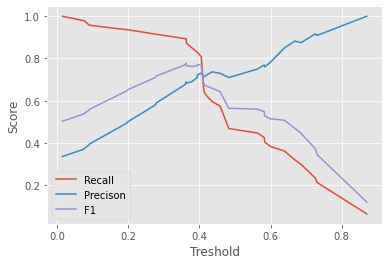

In [1030]:
recall_lr_2 = []
precision_lr_2 = []
f1_score_lr_2 = []
for thresh in threshold[3:]:
    y_pred = np.where(y_pred_test_class_1 > thresh, 1, 0)
    f1_score_lr_2.append(f1_score(y_test, y_pred ))
    recall_lr_2.append(recall_score(y_test, y_pred ))
    precision_lr_2.append(precision_score(y_test,y_pred))
plt.plot(threshold[3:],recall_lr_2, label = "Recall")
plt.plot(threshold[3:],precision_lr_2, label = "Precison")
plt.plot(threshold[3:],f1_score_lr_2, label = "F1")
plt.xlabel("Treshold")
plt.ylabel("Score")
plt.legend()
plt.show()


In [1031]:
threshold_value = 0.35
y_pred_threshold = [1 if prob > threshold_value else 0 for prob in y_pred_test_class_1]

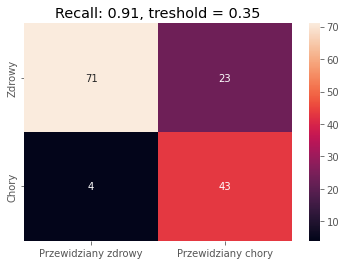

In [1032]:
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot=True)
plt.title(f"Recall: {recall_score(y_test, y_pred_threshold).round(2)}, treshold = {threshold_value}")
plt.xticks([0.5,1.5], ['Przewidziany zdrowy', 'Przewidziany chory'])
plt.yticks([0.5,1.5], ['Zdrowy', 'Chory'])
plt.show()

In [1033]:
summary.append(["Final_Lr",recall_score(y_test, y_pred_threshold).round(2),0.35, {lr_2_auc.round(2)}])

In [1034]:
pd.DataFrame(data= summary,columns=['Clasiffier', 'Recall', 'Threshold',"AUC"])

,Clasiffier,Recall,Threshold,AUC
0,KNN,0.43,-,-
1,Lr,0.89,0.26,{0.86}
2,SCV,0.83,2.8,{0.74}
3,RFC,0.85,0.3,{0.85}
4,Final_Lr,0.91,0.35,{0.87}
5,Final_Lr,0.91,0.35,{0.87}
6,Final_Lr,0.91,0.35,{0.87}
7,Final_Lr,0.91,0.35,{0.87}
8,Final_Lr,0.91,0.35,{0.87}


## Summary

<font size="5"> The final model scored AUC = 0.87, it's a slight improvement from the previous version of \
logistic regression (AUC = 0.86), the final model had a recall of 0.91 for threshold = 0.35.
Model predicted 43 diabetics out of 47 and 71 healthy people out of 94 in testing set. </font>